In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import linear regression from the Scipy stats module.
from scipy.stats import linregress

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

89.63282607535228 103.3482161935213
-40.56632023165996 89.12861726069787
67.50260068348777 -148.53194987140506
10.767440845394859 44.99701369801909
69.907410391891 -43.80422380254339
1.9204272104145872 88.99370105422656
-26.034097749007778 -177.61686997469957
18.54443540774247 -29.222066257515394
39.152328150877366 -128.9866365056147
-60.34844430358821 -125.4812552262279
-5.436085021164331 27.928719189382832
-46.95189139386585 -32.762381144885495
-48.16369859710866 -127.9162502370034
-65.7837758095375 -160.54225535605588
76.09508626583911 154.26358838131995
35.36702699047382 36.245464918867754
47.359317564565174 -107.10524117766123
46.737978685947155 -153.5986884078062
48.472374755080864 15.234294608752265
84.32606150568415 128.40183071949178
-57.45240500094676 20.494349356006012
-42.58236007845878 103.05153322932881
-54.56742480495905 43.914192256695
-67.03183315431608 117.51884110158778
27.15898768384703 -126.0225908512974
17.471650261333266 -150.90760549750402
63.02957443244523 38.0

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

khatanga ru
busselton au
college us
berbera so
ilulissat gl
banda aceh id
vaini to
ponta do sol cv
fortuna us
rikitea pf
kongolo cd
cidreira br
rikitea pf
mataura pf
chokurdakh ru
jablah sy
miles city us
kodiak us
zwettl at
tiksi ru
bredasdorp za
busselton au
east london za
albany au
lompoc us
hilo us
onega ru
mpika zm
ayios matthaios gr
narsaq gl
tasiilaq gl
saskylakh ru
lushunkou cn
kachikau bw
chifeng cn
kapaa us
richards bay za
saskylakh ru
qaanaaq gl
geraldton au
mataura pf
jamestown sh
la ronge ca
praia da vitoria pt
hithadhoo mv
attawapiskat ca
hermanus za
busselton au
kyra ru
bluff nz
mar del plata ar
fairbanks us
upernavik gl
lahat id
albany au
richards bay za
mataura pf
dikson ru
port alfred za
jamestown sh
ribeira grande pt
srednekolymsk ru
bonthe sl
jamestown sh
langarud ir
wanning cn
marzuq ly
busselton au
kodiak us
pocone br
kodiak us
kapaa us
new norfolk au
severo-kurilsk ru
barentsburg sj
qaanaaq gl
kungalv se
bayir jo
puerto ayora ec
kuryk kz
churapcha ru
zhuhai cn
rik

alofi nu
tuatapere nz
christchurch nz
fortuna us
attawapiskat ca
esperance au
new norfolk au
yumen cn
yellowknife ca
mount gambier au
talcahuano cl
kodiak us
leningradskiy ru
busselton au
ushuaia ar
augustow pl
souillac mu
atuona pf
kapaa us
mataura pf
hernani ph
bethel us
torbay ca
sabha ly
east moline us
ostersund se
samalaeulu ws
saldanha za
jiangyou cn
avarua ck
grindavik is
brae gb
avarua ck
lebu cl
roald no
bani do
beni suef eg
iquique cl
hilo us
simao cn
mar del plata ar
port elizabeth za
dikson ru
ponta do sol cv
bethel us
albany au
petlawad in
bacuit ph
grand river south east mu
terra santa br
ushuaia ar
arraial do cabo br
ushuaia ar
soderhamn se
rikitea pf
korla cn
hermanus za
xining cn
tuktoyaktuk ca
nizwa om
hami cn
ayorou ne
hermanus za
ushuaia ar
nome us
port lincoln au
tuktoyaktuk ca
jamestown sh
puqi cn
mouzakion gr
atuona pf
vila do maio cv
laguna br
taltal cl
longyearbyen sj
lenine ua
ushuaia ar
acapulco mx
tuktoyaktuk ca
carutapera br
saint-joseph re
tecoanapa mx
man

nikolskoye ru
mar del plata ar
geresk af
ushuaia ar
nikolskoye ru
pevek ru
havre-saint-pierre ca
norman wells ca
barentsburg sj
punta arenas cl
bethel us
guerrero negro mx
punta arenas cl
punta arenas cl
port alfred za
clyde river ca
hithadhoo mv
atuona pf
punta arenas cl
tiksi ru
chokurdakh ru
port moresby pg
bredasdorp za


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | berbera
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | banda aceh
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kongolo
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | jablah
Processing Record 16 of Set 1 | miles city
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | zwettl
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | lompoc
Processing Record 24 of Set 1 | hilo
Processing Record 25 of Set 1 | on

Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | grimshaw
Processing Record 43 of Set 4 | rawson
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | mariental
Processing Record 49 of Set 4 | acari
Processing Record 50 of Set 4 | peniche
Processing Record 1 of Set 5 | talara
Processing Record 2 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 5 | jijiga
Processing Record 4 of Set 5 | mackenzie
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | ratnagiri
Processing Record 7 of Set 5 | mogadishu
Processing Record 8 of Set 5 | maceio
Processing Record 9 of Set 5 | ayan
Processing Record 10 of Set 5 | volga
Processing Record 11 of Set 5 | brae
Processing R

Processing Record 28 of Set 8 | roald
Processing Record 29 of Set 8 | bani
Processing Record 30 of Set 8 | beni suef
Processing Record 31 of Set 8 | iquique
Processing Record 32 of Set 8 | simao
Processing Record 33 of Set 8 | petlawad
Processing Record 34 of Set 8 | bacuit
City not found. Skipping...
Processing Record 35 of Set 8 | terra santa
Processing Record 36 of Set 8 | soderhamn
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | xining
Processing Record 39 of Set 8 | nizwa
Processing Record 40 of Set 8 | hami
Processing Record 41 of Set 8 | ayorou
Processing Record 42 of Set 8 | nome
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | puqi
Processing Record 45 of Set 8 | mouzakion
City not found. Skipping...
Processing Record 46 of Set 8 | vila do maio
Processing Record 47 of Set 8 | laguna
Processing Record 48 of Set 8 | lenine
Processing Record 49 of Set 8 | acapulco
Processing Record 50 of Set 8 | carutapera
Processing Record 1 of S

Processing Record 13 of Set 12 | sorvag
City not found. Skipping...
Processing Record 14 of Set 12 | belmonte
Processing Record 15 of Set 12 | llandrindod wells
Processing Record 16 of Set 12 | itupiranga
Processing Record 17 of Set 12 | merke
Processing Record 18 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 19 of Set 12 | guanica
Processing Record 20 of Set 12 | campoalegre
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | riyadh
Processing Record 24 of Set 12 | porto santo
Processing Record 25 of Set 12 | chivay
Processing Record 26 of Set 12 | the valley
Processing Record 27 of Set 12 | atlantis
Processing Record 28 of Set 12 | sukhothai
Processing Record 29 of Set 12 | ust-kulom
Processing Record 30 of Set 12 | libertador general san martin
Processing Record 31 of Set 12 | tiarei
Processing Record 32 of Set 12 | sao geraldo do araguaia
Processing Record 33 of Set 12 | zhigansk
Processing Record 34 

In [8]:
# Confrim over 500 cities were retrieved
len(city_data)

591

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df
# Reorder Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df.reindex(columns=new_column_order)
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-08-02 19:52:54,71.9667,102.5000,43.61,72,100,5.66
1,Busselton,AU,2022-08-02 19:52:54,-33.6500,115.3333,55.06,52,97,27.74
2,College,US,2022-08-02 19:52:54,64.8569,-147.8028,64.35,82,75,5.75
3,Berbera,SO,2022-08-02 19:52:55,10.4396,45.0143,91.81,43,47,17.67
4,Ilulissat,GL,2022-08-02 19:52:55,69.2167,-51.1000,44.08,75,52,4.54
...,...,...,...,...,...,...,...,...,...
586,Shelburne,CA,2022-08-02 20:07:07,44.0787,-80.2041,72.23,53,0,9.66
587,Lyangasovo,RU,2022-08-02 20:09:07,58.5176,49.4472,59.41,69,30,3.02
588,Luba,GQ,2022-08-02 20:09:07,3.4568,8.5547,75.43,82,54,5.57
589,Havre-Saint-Pierre,CA,2022-08-02 20:09:08,50.2334,-63.5986,68.36,77,100,10.36


In [10]:
# Create the ouput file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

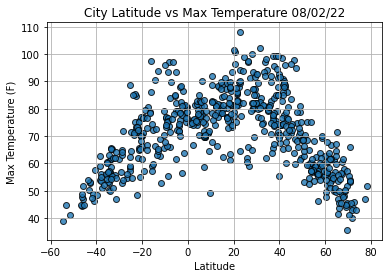

In [12]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other properties.
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

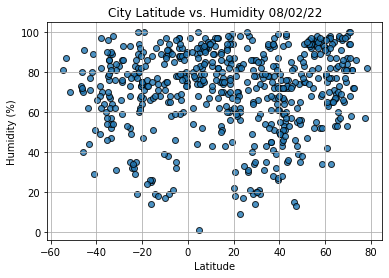

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

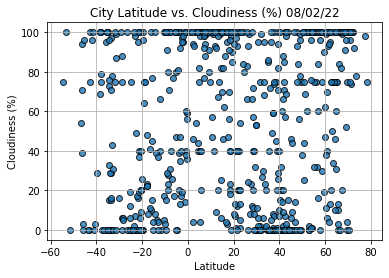

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

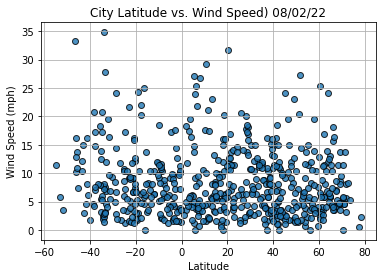

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create a Northern Hemisphere DataFrames from the city_data_df DataFrame.
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-08-02 19:52:59
Lat                       70.6333
Lng                      147.9167
Max Temp                    53.11
Humidity                       68
Cloudiness                    100
Wind Speed                   5.55
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
586     True
587     True
588     True
589     True
590    False
Name: Lat, Length: 591, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-08-02 19:52:54,71.9667,102.5000,43.61,72,100,5.66
2,College,US,2022-08-02 19:52:54,64.8569,-147.8028,64.35,82,75,5.75
3,Berbera,SO,2022-08-02 19:52:55,10.4396,45.0143,91.81,43,47,17.67
4,Ilulissat,GL,2022-08-02 19:52:55,69.2167,-51.1000,44.08,75,52,4.54
5,Banda Aceh,ID,2022-08-02 19:51:43,5.5577,95.3222,77.79,79,100,14.79


In [20]:
# Create Northern and Southern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

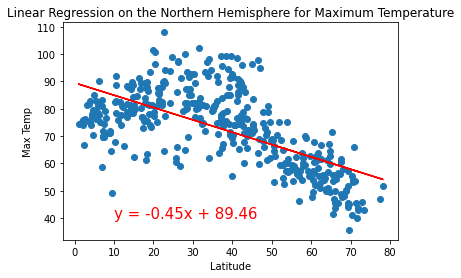

In [21]:
# Linear regression on the Northern Hemisphere Maximum for Latitude vs Maximum Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10, 40))

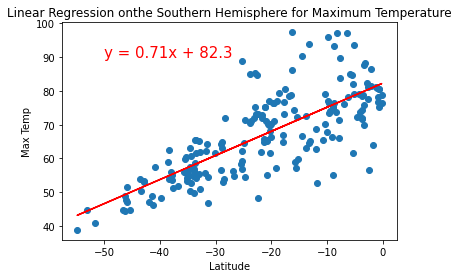

In [22]:
# Linear regression on the Southern Hemisphere for Latitude vs Maximum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression onthe Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50, 90))

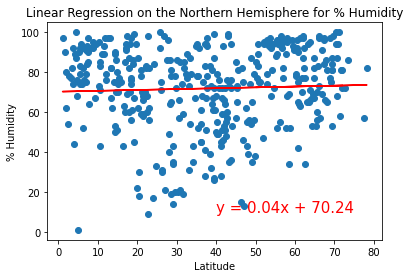

In [23]:
# Linear regression on the Northern Hemisphere for Latitude vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

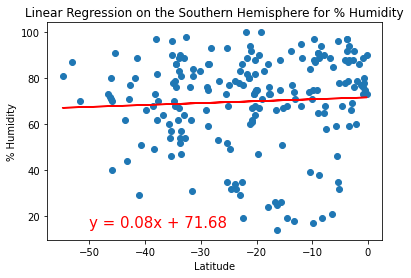

In [24]:
# Linear regression on the Southern for Hemisphere Latitude vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Humidity', 
                      '% Humidity', (-50,15))

In [ ]:
# Getting all the r-values of the weather parameters for northern and southern hemisphere
nh_lats = 

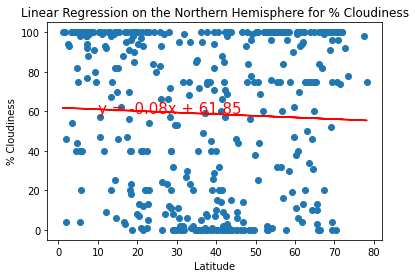

In [25]:
# Linear regression on the Northern Hemisphere for Latitude vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (10, 59))

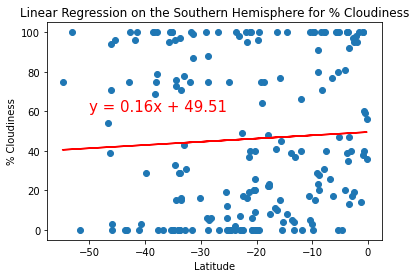

In [26]:
# Linear regression on the Southern Hemisphere Latitude vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50, 60))

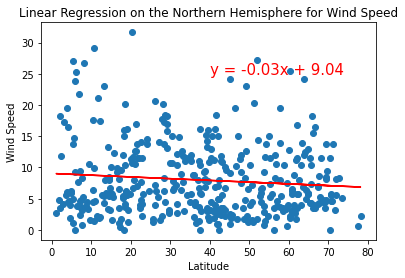

In [28]:
# Linear regression on the Northern Hemisphere Latitude vs Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed',
                      'Wind Speed', (40, 25))

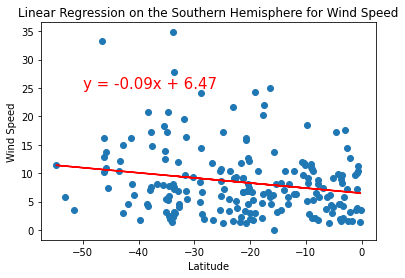

In [30]:
# Linear regression on the Southern Hemisphere Latitude vs Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed', (-50, 25))